# Mini Project Group M26


# Email Spam Detection

## Load Email Data from given .csv file

In [1]:
import turicreate as tc
data=tc.load_sframe('final_data')

In [2]:
data

text,spam
Subject: naturallyirresistible your ...,1
Subject: the stocktrading gunslinger f ...,1
Subject: unbelievable newhomes made easy im ...,1
Subject: 4 color printingspecial request ...,1
"Subject: do not havemoney , get software cds ...",1
"Subject: great nnewshello , welcome to ...",1
Subject: here ' s a hotplay in motion homeland ...,1
Subject: save your moneybuy getting this thing ...,1
Subject: undeliverable :home based business for ...,1
Subject: save your moneybuy getting this thing ...,1


In [3]:
data.show()

Materializing SFrame

In [4]:
print(data.num_rows,data.num_columns)

<bound method SFrame.num_rows of Columns:
	text	str
	spam	int

Rows: 8729

Data:
+-------------------------------+------+
|              text             | spam |
+-------------------------------+------+
| Subject: naturally irresis... |  1   |
| Subject: the stock trading... |  1   |
| Subject: unbelievable new ... |  1   |
| Subject: 4 color printing ... |  1   |
| Subject: do not have money... |  1   |
| Subject: great nnews  hell... |  1   |
| Subject: here ' s a hot pl... |  1   |
| Subject: save your money b... |  1   |
| Subject: undeliverable : h... |  1   |
| Subject: save your money b... |  1   |
+-------------------------------+------+
[8729 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.> <bound method SFrame.num_columns of Columns:
	text	str
	spam	int

Rows: 8729

Data:
+-------------------------------+------+
|              text             | spam |
+-------------------------

## Check for Entries other than 0 and 1 in 'spam' column

In [5]:
print(data[(data['spam']!=1)&(data['spam']!=0)])

+------+------+
| text | spam |
+------+------+
+------+------+
[? rows x 2 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


## Perform word counting on 'text' column to get dictionary with count of each individual word

In [6]:
data['word_count']=tc.text_analytics.count_words(data['text'])

In [7]:
data

text,spam,word_count
Subject: naturallyirresistible your ...,1,"{'interested': 1.0,'have': 1.0, 'this': ..."
Subject: the stocktrading gunslinger f ...,1,"{'albeit': 1.0,'diffusion': 1.0, ..."
Subject: unbelievable newhomes made easy im ...,1,"{'pittman': 1.0,'foward': 1.0, 'form': ..."
Subject: 4 color printingspecial request ...,1,"{'and': 1.0, 'color':1.0, '338': 2.0, ..."
"Subject: do not havemoney , get software cds ...",1,"{'death': 1.0, 'by': 2.0,'d': 1.0, 'finish': 1.0, ..."
"Subject: great nnewshello , welcome to ...",1,"{'day': 1.0,'devitalize': 1.0, ..."
Subject: here ' s a hotplay in motion homeland ...,1,"{'guarantee': 1.0,'sources': 1.0, 'was': ..."
Subject: save your moneybuy getting this thing ...,1,"{'get': 1.0, 'aicohol':1.0, 'with': 1.0, 'mix': ..."
Subject: undeliverable :home based business for ...,1,"{'unknown': 1.0, '6':1.0, 'co': 1.0, '7059': ..."
Subject: save your moneybuy getting this thing ...,1,"{'get': 1.0, 'with': 1.0,'mix': 1.0, 'minutes': ..."


In [8]:
data.tail()

text,spam,word_count
I am back. Good journey!Let me know if you need ...,0,"{'pendent': 1.0, 'shall':1.0, 'receipts': 1.0, ..."
So that takes away somemoney worries ...,0,"{'worries': 1.0, 'money':1.0, 'some': 1.0, 'aw ..."
"aight we can pick someup, you open before ...",0,"{'tonight': 1.0, 'open':1.0, 'before': 1.0, ..."
"Latest News! Policestation toilet stolen, ...",1,"{'on': 1.0, 'go': 1.0,'news': 1.0, 'latest': ..."
Sac needs to carry on:),0,"{'carry': 1.0, 'to': 1.0,'on': 1.0, 'needs': 1.0, ..."
Just sing HU. I think itsalso important to find ...,0,"{'girls': 1.0, 'ask':1.0, 'doubt': 1.0, ..."
What???? Hello wats talksemail address? ...,0,"{'address': 1.0, 'hello':1.0, 'email': 1.0, ..."
Except theres a chickwith huge boobs. ...,0,"{'boobs': 1.0, 'huge':1.0, 'with': 1.0, ..."
Im just wondering whatyour doing right now? ...,0,"{'now': 1.0, 'right':1.0, 'your': 1.0, 'wh ..."
Wishing you a beautifulday. Each moment ...,0,"{'it': 1.0, 'enjoy': 1.0,'smiling': 1.0, 'keep': ..."


## Divide dataframe into train and test sets

In [9]:
train_set,test_set=data.random_split(0.9,seed=0)

## Train Binary Classification Model 

In [12]:
spam_model=tc.logistic_classifier.create(train_set,target='spam',features=['word_count'],validation_set=test_set)

Logistic regression:

--------------------------------------------------------

Number of examples          : 7847

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 38205

Number of coefficients      : 38206

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.165448     | 0.901873          | 0.880952            |

| 1         | 5        | 0.500000  | 0.319494     | 0.962406          | 0.908163            |

| 2         | 6        | 0.625000  | 0.412599     | 0.990060          | 0.930839            |

| 3         | 7        | 0.781250  | 0.491008     | 0.995030          | 0.943311            |

| 4         | 8        | 0.976563  | 0.572843     | 0.997451          | 0.955782            |

| 9         | 14       | 1.000000  | 0.875811     | 1.000000          | 0.964853            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

## Analyse and Evaluate the trained model

In [13]:
spam_model.coefficients

name,index,class,value,stderr
(intercept),None,1,-2.1551537221794774,None
word_count,interested,1,-0.03977551022407681,None
word_count,have,1,-0.04439832885817555,None
word_count,this,1,0.011698978159265388,None
word_count,love,1,-0.590812722642387,None
word_count,surethat,1,0.401799523962274,None
word_count,no,1,-0.06322616653695905,None
word_count,with,1,-0.020093544584771326,None
word_count,provide,1,0.024721268929507313,None
word_count,extra,1,0.34067959740219245,None


In [14]:
spam_model.evaluate(train_set)

{'accuracy': 1.0,
 'auc': 1.0000000000000058,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 2
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        0        |  6258 |
 |      1       |        1        |  1589 |
 +--------------+-----------------+-------+
 [2 rows x 3 columns],
 'f1_score': 1.0,
 'log_loss': 0.0027570261631529058,
 'precision': 1.0,
 'recall': 1.0,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+---------------------+-----+------+------+
 | threshold |         fpr         | tpr |  p   |  n   |
 +-----------+---------------------+-----+------+------+
 |    0.0    |         1.0         | 1.0 | 1589 | 6258 |
 |   1e-05   |  0.5583253435602429 | 1.0 | 1589 | 6258 |
 |   2e-05   |  0.5314797059763503 | 1.0 | 1589 | 6258 |
 |   3e-05   |  0.515020773

## Predict emails in test set as spam(>0.5) or ham(<=0.5)

In [15]:
test_set['predicted_results']=spam_model.predict(test_set,output_type='probability')

In [16]:
test_set

text,spam,word_count,predicted_results
Subject: brighten thoseteeth get your teeth ...,1,"{'then': 1.0, 'via': 1.0,'promotions': 1.0, ...",0.9917837483731741
Subject: search engineposition be the very ...,1,"{'com': 1.0, 'speedy':1.0, 'line': 1.0, ...",0.9999788227344301
Subject: want to acceptcredit cards ? 126432211 ...,1,"{'it': 1.0, 'cecks': 1.0,'do': 1.0, 'subject': ...",0.08450006536858909
"Subject: localizedsoftware , all languages ...",1,"{'reqards': 1.0, 'best':1.0, 'ianguaqe': 1.0, ...",0.999995646761379
Subject: select small -cap for astute investors ...,1,"{'reliable': 1.0,'including': 1.0, ...",1.0
"Subject: localizedsoftware , all languages ...",1,"{'reqards': 1.0, 'best':1.0, 'lanquage': 1.0, ...",0.9999825878367608
Subject: i know yourcompany ! lt is really ...,1,"{'interested': 1.0,'have': 1.0, 'this': ...",0.999970237696562
Subject: [ ilug ] re :popular . biz and . com ...,1,"{'listmaster': 1.0,'maintainer': 1.0, ...",0.999999988253215
Subject: enhance youranatomy the longz sy ...,1,"{'all': 1.0, 'yes': 1.0,'much': 1.0, 'remarked': ...",0.9999998818593003
Subject: learn to playtexas hold ' em and o ...,1,"{'jybwgyay': 1.0, 'here':1.0, 'and': 1.0, 'oth ...",0.9866798365489347


## Evaluate Predictions for Accuracy and Confusion Matrix

In [17]:
spam_model.evaluate(test_set)

{'accuracy': 0.9648526077097506,
 'auc': 0.9743792204374032,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        0        |  709  |
 |      1       |        0        |   29  |
 |      1       |        1        |  142  |
 |      0       |        1        |   2   |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9015873015873015,
 'log_loss': 0.14873920041723596,
 'precision': 0.9861111111111112,
 'recall': 0.8304093567251462,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+--------------------+-----+-----+
 | threshold |        fpr         |        tpr         |  p  |  n  |
 +-----------+--------------------+--------------------+-----+-----+
 |    0.0    |  

## Again use trained model for predictions on train_set

In [18]:
train_set['predicted_results']=spam_model.predict(train_set,output_type='probability')

In [19]:
train_set

text,spam,word_count,predicted_results
Subject: naturallyirresistible your ...,1,"{'interested': 1.0,'have': 1.0, 'this': ...",0.9999963138220579
Subject: the stocktrading gunslinger f ...,1,"{'albeit': 1.0,'diffusion': 1.0, ...",0.9999250270162908
Subject: unbelievable newhomes made easy im ...,1,"{'pittman': 1.0,'foward': 1.0, 'form': ...",0.9995107355997614
Subject: 4 color printingspecial request ...,1,"{'and': 1.0, 'color':1.0, '338': 2.0, ...",0.9999248590816272
"Subject: do not havemoney , get software cds ...",1,"{'death': 1.0, 'by': 2.0,'d': 1.0, 'finish': 1.0, ...",0.9961222832690997
"Subject: great nnewshello , welcome to ...",1,"{'day': 1.0,'devitalize': 1.0, ...",0.9999856254871661
Subject: here ' s a hotplay in motion homeland ...,1,"{'guarantee': 1.0,'sources': 1.0, 'was': ...",1.0
Subject: save your moneybuy getting this thing ...,1,"{'get': 1.0, 'aicohol':1.0, 'with': 1.0, 'mix': ...",0.9992442567520703
Subject: undeliverable :home based business for ...,1,"{'unknown': 1.0, '6':1.0, 'co': 1.0, '7059': ...",0.9997760324174951
Subject: save your moneybuy getting this thing ...,1,"{'get': 1.0, 'with': 1.0,'mix': 1.0, 'minutes': ...",0.9994950996417747


## Graphically analyse relation b/w given and predicted results

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

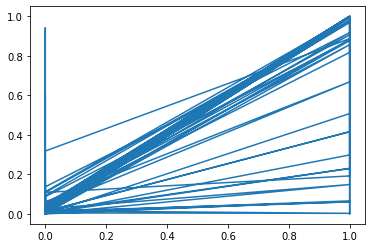

In [21]:
plt.plot(test_set['spam'],test_set['predicted_results'],'-')

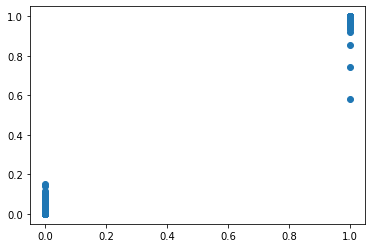

In [22]:
plt.plot(train_set['spam'],train_set['predicted_results'],'o')

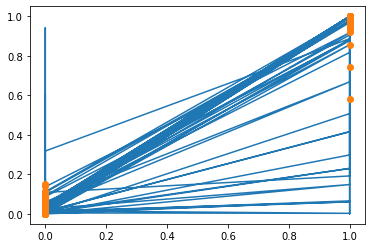

In [23]:
plt.plot(test_set['spam'],test_set['predicted_results'],'-',train_set['spam'],train_set['predicted_results'],'o')

In [24]:
spam_model.save('final_prediction_model')